In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

 #Útil en:

#Comparaciones de variables en análisis de datos, creación de combinaciones para modelos, evaluación de correlaciones entre pares de variables
#------------------------------------------------------------------------

from itertools import combinations

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")



# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------

import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest




# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [61]:
df_masc_surv= pd.read_csv("files/raw-responses.csv",index_col=0) 
df_masc_surv.head(5)

,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),NaN,A lot,No,Yes,So

##### Cambiar nombre de columnas

In [62]:
rename_dict = {
    "StartDate": "start_date",
    "EndDate": "end_date",
    "q0001": "self_perceived_masculinity",
    "q0002": "importance_of_being_seen_as_masculine",
    
    # Q4: Sources of masculinity (multirespuesta)
    "q0004_0001": "source_of_masculinity_father_figure",
    "q0004_0002": "source_of_masculinity_mother_figure",
    "q0004_0003": "source_of_masculinity_family_members",
    "q0004_0004": "source_of_masculinity_pop_culture",
    "q0004_0005": "source_of_masculinity_friends",
    "q0004_0006": "source_of_masculinity_other",

    "q0005": "societal_pressure_on_men",

    # Q7: Lifestyle frequency (multirespuesta)
    "q0007_0001": "lifestyle_ask_friend_professional_advice",
    "q0007_0002": "lifestyle_ask_friend_personal_advice",
    "q0007_0003": "lifestyle_show_affection_to_male_friends",
    "q0007_0004": "lifestyle_crying",
    "q0007_0005": "lifestyle_physical_fight",
    "q0007_0006": "lifestyle_sexual_relations_with_women",
    "q0007_0007": "lifestyle_sexual_relations_with_men",
    "q0007_0008": "lifestyle_watch_sports",
    "q0007_0009": "lifestyle_work_out",
    "q0007_0010": "lifestyle_see_therapist",
    "q0007_0011": "lifestyle_feel_lonely_or_isolated",

    # Q8: Daily worries (multirespuesta)
    "q0008_0001": "daily_worry_height",
    "q0008_0002": "daily_worry_weight",
    "q0008_0003": "daily_worry_hair",
    "q0008_0004": "daily_worry_physique",
    "q0008_0005": "daily_worry_genitalia",
    "q0008_0006": "daily_worry_clothing_style",
    "q0008_0007": "daily_worry_sexual_performance",
    "q0008_0008": "daily_worry_mental_health",
    "q0008_0009": "daily_worry_physical_health",
    "q0008_0010": "daily_worry_finances",
    "q0008_0011": "daily_worry_provide_for_family",
    "q0008_0012": "daily_worry_none",

    "q0009": "employment_status",

    # Q10: Advantages of being a man at work (multirespuesta)
    "q0010_0001": "advantage_of_being_a_man_more_money",
    "q0010_0002": "advantage_of_being_a_man_taken_more_seriously",
    "q0010_0003": "advantage_of_being_a_man_more_choice",
    "q0010_0004": "advantage_of_being_a_man_more_promotion_opportunities",
    "q0010_0005": "advantage_of_being_a_man_praised_more",
    "q0010_0006": "advantage_of_being_a_man_more_manager_support",
    "q0010_0007": "advantage_of_being_a_man_other",
    "q0010_0008": "advantage_of_being_a_man_none",

    # Q11: Disadvantages (multirespuesta)
    "q0011_0001": "disadvantage_of_being_a_man_hiring_promoting_women",
    "q0011_0002": "disadvantage_of_being_a_man_risk_accusation_harassment",
    "q0011_0003": "disadvantage_of_being_a_man_risk_accusation_bias",
    "q0011_0004": "disadvantage_of_being_a_man_other",
    "q0011_0005": "disadvantage_of_being_a_man_none",

    # Q12: Response to harassment (multirespuesta)
    "q0012_0001": "response_to_harassment_confronted_accused",
    "q0012_0002": "response_to_harassment_contacted_hr",
    "q0012_0003": "response_to_harassment_contacted_manager",
    "q0012_0004": "response_to_harassment_supported_victim",
    "q0012_0005": "response_to_harassment_did_nothing",
    "q0012_0006": "response_to_harassment_never_witnessed",
    "q0012_0007": "response_to_harassment_other",

    "q0013": "reason_for_no_response",

    "q0014": "heard_about_metoo",
    "q0015": "behavior_changed_at_work_due_to_metoo",

    # Q17–Q18: Romantic dynamics
    "q0017": "expected_to_make_first_move",
    "q0018": "how_often_pay_on_date",

    # Q19: Reasons for paying on a date (multirespuesta)
    "q0019_0001": "reason_for_paying_on_date_right_thing",
    "q0019_0002": "reason_for_paying_on_date_earn_more",
    "q0019_0003": "reason_for_paying_on_date_feel_good",
    "q0019_0004": "reason_for_paying_on_date_societal_expectations",
    "q0019_0005": "reason_for_paying_on_date_obligation_for_asking_out",
    "q0019_0006": "reason_for_paying_on_date_test_response",
    "q0019_0007": "reason_for_paying_on_date_other",

    # Q20: Gauging interest (multirespuesta)
    "q0020_0001": "gauge_interest_by_body_language",
    "q0020_0002": "gauge_interest_by_verbal_consent",
    "q0020_0003": "gauge_interest_by_physical_move",
    "q0020_0004": "gauge_interest_situation_different",
    "q0020_0005": "gauge_interest_unclear",
    "q0020_0006": "gauge_interest_other",

    # Q21: Boundaries (multirespuesta)
    "q0021_0001": "boundary_wondered_if_pushed_too_far",
    "q0021_0002": "boundary_discussed_with_friends",
    "q0021_0003": "boundary_contacted_past_partner",
    "q0021_0004": "boundary_none_above",

    "q0022": "changed_behavior_in_relationships_due_to_metoo",

    "q0024": "marital_status",
    "q0025_0001": "has_children_under_18",
    "q0025_0002": "has_children_over_18",
    "q0025_0003": "no_children",

    "q0026": "sexual_orientation",
    "q0028": "race",
    "q0029": "education_level",
    "q0030": "state",

    # Demographic extended data
    "q0034": "income_bracket",
    "q0035": "us_region",  # Renombrado para reflejar las regiones de EE.UU.
    "q0036": "device_and_os_usage",  # Renombrado para reflejar los dispositivos y sistemas operativos.
    "race2": "race_classification",  # Renombrado para reflejar la clasificación racial.
    "racethn4": "race_and_ethnicity_detailed",  # Renombrado para reflejar detalles de raza y etnia.
    "educ3": "education_level_grouped",  # Renombrado para reflejar el nivel educativo general.
    "educ4": "education_level_detailed",  # Renombrado para reflejar los detalles del nivel educativo.
    "age3": "age_group",
    "kids": "has_kids",
    "orientation": "sexual_orientation_label",
    "weight": "response_weight"
}


In [63]:
df_masc_surv.rename(columns=rename_dict, inplace=True)


##### Tratar columnas multirespuestas 🚩🚩

In [64]:
# Definir la lista de columnas a procesar
columns_to_process = [
    "daily_worry_height", "daily_worry_weight", "daily_worry_hair", "daily_worry_physique",
    "daily_worry_genitalia", "daily_worry_clothing_style", "daily_worry_sexual_performance",
    "daily_worry_mental_health", "daily_worry_physical_health", "daily_worry_finances",
    "daily_worry_provide_for_family", "daily_worry_none"
]

# Definir el valor que representa "no seleccionado"
not_selected_value = "Not selected"

# Convertir las respuestas de las columnas en valores binarios
for col in columns_to_process:
    df_masc_surv[col] = df_masc_surv[col].apply(lambda x: 1 if x != not_selected_value else 0)


In [65]:
# Contar el número de preocupaciones seleccionadas por cada encuestado
df_masc_surv['total_worries'] = df_masc_surv[columns_to_process].sum(axis=1)



##### Función binarizar columnas multirespuesta

In [66]:
def binarizar_columnas(df, columnas, valor_no_seleccionado="Not selected"):
    """
    Convierte las columnas especificadas en valores binarios:
    1 si el valor es distinto de 'valor_no_seleccionado', 0 si es igual.
    
    Parámetros:
    df : DataFrame de pandas
    columnas : lista de nombres de columnas a procesar
    valor_no_seleccionado : valor que representa una opción no seleccionada (por defecto: "Not selected")
    
    Retorna:
    df : DataFrame con las columnas actualizadas
    """
    for col in columnas:
        df[col] = df[col].apply(lambda x: 1 if x != valor_no_seleccionado else 0)
    return df


In [79]:
columns_to_process = [
 "boundary_wondered_if_pushed_too_far",
     "boundary_discussed_with_friends",
     "boundary_contacted_past_partner",
     "boundary_none_above",

]

df_masc_surv = binarizar_columnas(df_masc_surv, columns_to_process)


In [80]:
df_masc_surv.head()

,start_date,end_date,self_perceived_masculinity,importance_of_being_seen_as_masculine,source_of_masculinity_father_figure,source_of_masculinity_mother_figure,source_of_masculinity_family_members,source_of_masculinity_pop_culture,source_of_masculinity_friends,source_of_masculinity_other,societal_pressure_on_men,lifestyle_ask_friend_professional_advice,lifestyle_ask_friend_personal_advice,lifestyle_show_affection_to_male_friends,lifestyle_crying,lifestyle_physical_fight,lifestyle_sexual_relations_with_women,lifestyle_sexual_relations_with_men,lifestyle_watch_sports,lifestyle_work_out,lifestyle_see_therapist,lifestyle_feel_lonely_or_isolated,daily_worry_height,daily_worry_weight,daily_worry_hair,daily_worry_physique,daily_worry_genitalia,daily_worry_clothing_style,daily_worry_sexual_performance,daily_worry_mental_health,daily_worry_physical_health,daily_worry_finances,daily_worry_provide_for_family,daily_worry_none,employment_status,advantage_of_being_a_man_more_money,advantage_of_being_a_man_taken_more_seriously,advantage_of_being_a_man_more_choice,advantage_of_being_a_man_more_promotion_opportunities,advantage_of_being_a_man_praised_more,advantage_of_being_a_man_more_manager_support,advantage_of_being_a_man_other,advantage_of_being_a_man_none,disadvantage_of_being_a_man_hiring_promoting_women,disadvantage_of_being_a_man_risk_accusation_harassment,disadvantage_of_being_a_man_risk_accusation_bias,disadvantage_of_being_a_man_other,disadvantage_of_being_a_man_none,response_to_harassment_confronted_accused,response_to_harassment_contacted_hr,response_to_harassment_contacted_manager,response_to_harassment_supported_victim,response_to_harassment_did_nothing,response_to_harassment_never_witnessed,response_to_harassment_other,reason_for_no_response,heard_about_metoo,behavior_changed_at_work_due_to_metoo,expected_to_make_first_move,how_often_pay_on_date,reason_for_paying_on_date_right_thing,reason_for_paying_on_date_earn_more,reason_for_paying_on_date_feel_good,reason_for_paying_on_date_societal_expectations,reason_for_paying_on_date_obligation_for_asking_out,reason_for_paying_on_date_test_response,reason_for_paying_on_date_other,gauge_interest_by_body_language,gauge_interest_by_verbal_consent,gauge_interest_by_physical_move,gauge_interest_situation_different,gauge_interest_unclear,gauge_interest_other,boundary_wondered_if_pushed_too_far,boundary_discussed_with_friends,boundary_contacted_past_partner,boundary_none_above,changed_behavior_in_relationships_due_to_metoo,marital_status,has_children_under_18,has_children_over_18,no_children,sexual_orientation,race,education_level,state,income_bracket,us_region,device_and_os_usage,race_classification,race_and_ethnicity_detailed,education_level_grouped,education_level_detailed,age_group,has_kids,sexual_orientation_label,response_weight,total_worries
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,0,0,0,1,0,0,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,0,0,1,0,0,0,0,0,1,1,0,0,"Not employed, NOT looking for work",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,Yes,Sometimes,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026,3
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,1,0,0,0,0,0,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,0,1,0,0,0,0,0,1,1,0,0,0,Not employed-retired,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,No,Rarely,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phon

In [85]:
df_masc_surv["lifestyle_see_therapist"].value_counts()

lifestyle_see_therapist
Never, but open to it        637
Never, and not open to it    461
Rarely                       267
Sometimes                    138
Often                         77
No answer                     35
Name: count, dtype: int64

In [81]:
# Guardar el DataFrame con los cambios en un nuevo archivo CSV
df_masc_surv.to_csv('transformed_responses.csv', index=False)


### VISUALIZACION👓

##### Cargar csv limpio para hacer las visualizaciones

In [ ]:
df_masc_surv = pd.read_csv("files/transformed_responses.csv",index_col=0) 
df_masc_surv.head(5)

##### Masculinidad👨

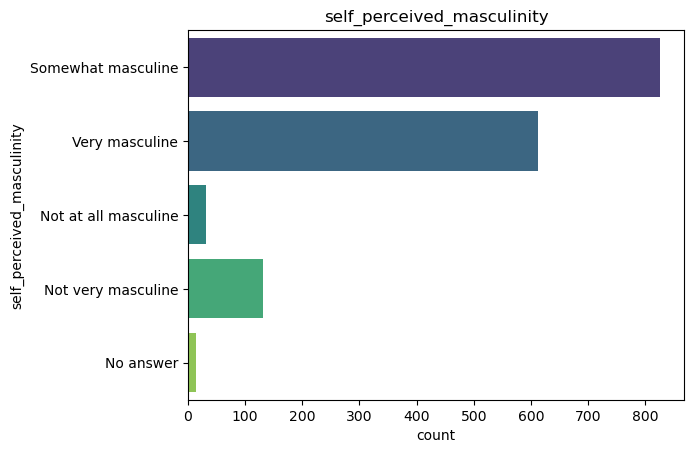

In [84]:
sns.countplot(y= "self_perceived_masculinity", data=df_masc_surv, palette='viridis')
plt.title("self_perceived_masculinity")
plt.show()

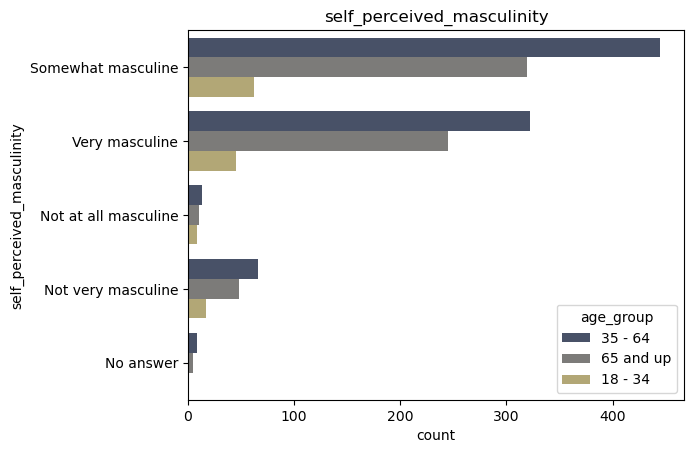

In [91]:
sns.countplot(y= "self_perceived_masculinity", data=df_masc_surv,hue="age_group", palette='cividis')
plt.title("self_perceived_masculinity")
plt.show()

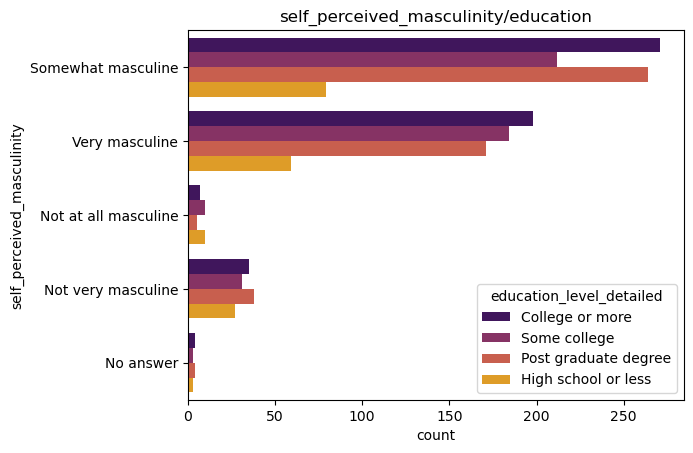

In [89]:
sns.countplot(y= "self_perceived_masculinity", data=df_masc_surv,hue="education_level_detailed", palette='inferno')
plt.title("self_perceived_masculinity/education")
plt.show()

##### Social Presure💪

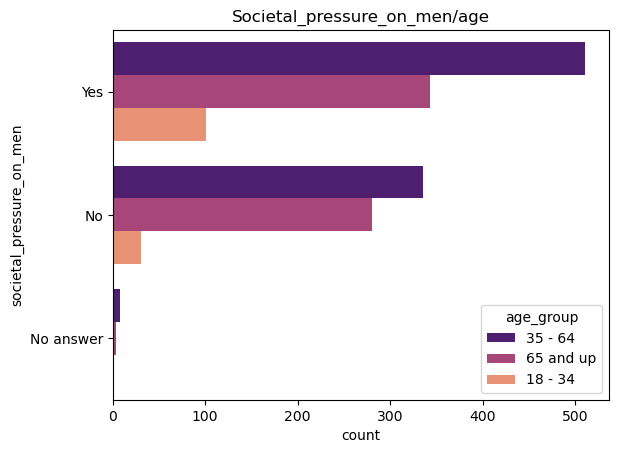

In [88]:
sns.countplot(y=  "societal_pressure_on_men", data=df_masc_surv,hue="age_group" ,palette='magma')
plt.title("Societal_pressure_on_men/age")
plt.show()

##### Worries😥

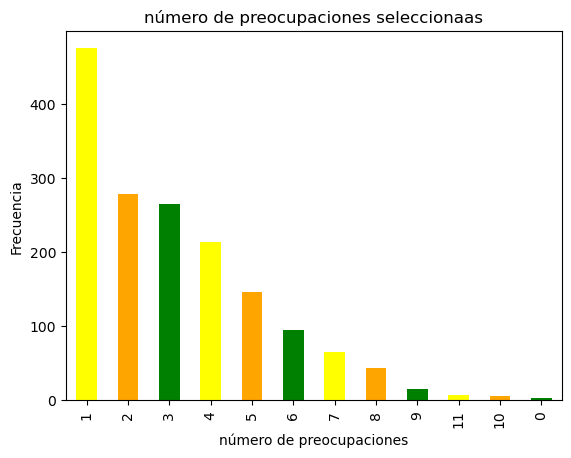

In [ ]:

df_masc_surv['total_worries'].value_counts().plot(kind='bar', color=["yellow","orange","green"])

# Título y ajustes
plt.title("número de preocupaciones seleccionaas")
plt.xlabel("número de preocupaciones")
plt.ylabel("Frecuencia")

# Mostrar la gráfica
plt.show()


In [34]:
columns_to_analize = ["daily_worry_height",
    "daily_worry_weight",
    "daily_worry_hair",
    "daily_worry_physique",
    "daily_worry_genitalia",
    "daily_worry_clothing_style",
    "daily_worry_sexual_performance",
    "daily_worry_mental_health",
    "daily_worry_physical_health",
    "daily_worry_finances",
    "daily_worry_provide_for_family",
    "daily_worry_none",
    ]

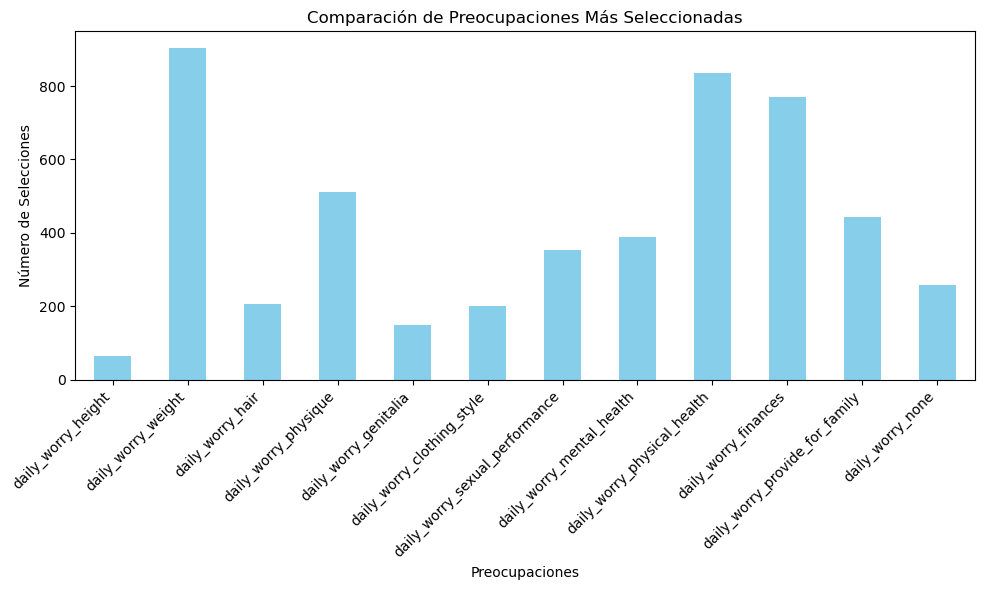

In [35]:


# Contar cuántas veces se seleccionó "1" (preocupación) en cada columna
selection_counts = df_masc_surv[columns_to_analize].sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
selection_counts.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
plt.title("Comparación de Preocupaciones Más Seleccionadas")
plt.xlabel("Preocupaciones")
plt.ylabel("Número de Selecciones")
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para que no se solapen

# Mostrar la gráfica
plt.tight_layout()  # Asegura que todo el texto y etiquetas se vean bien
plt.show()


<Figure size 1200x600 with 0 Axes>

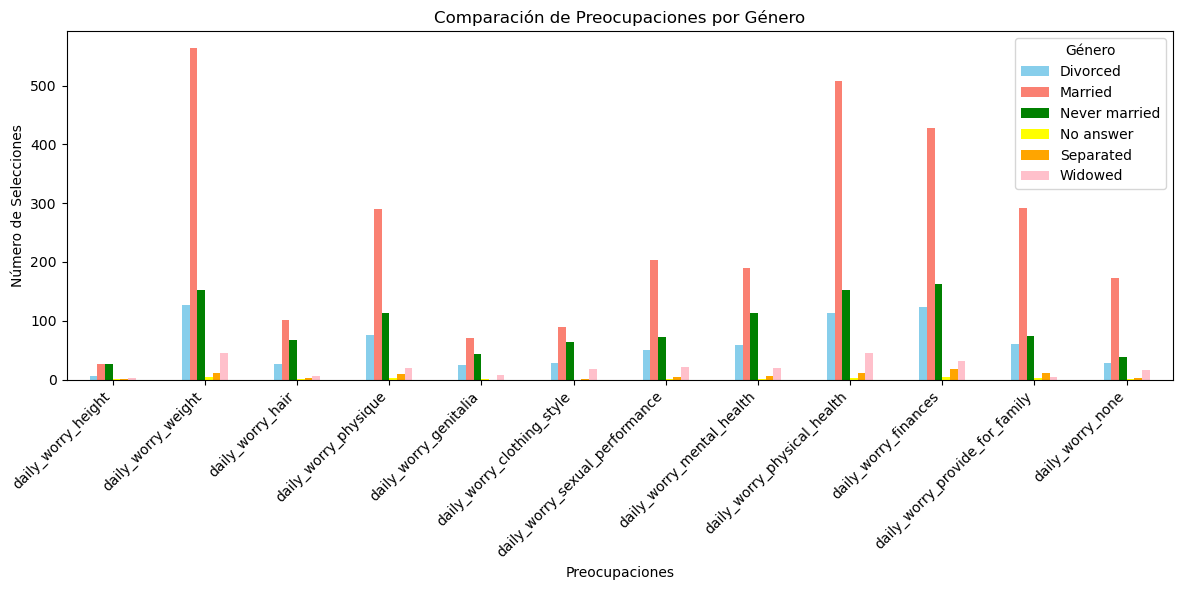

In [51]:


# Crear un nuevo DataFrame con la suma de cada preocupación por grupo
grouped_counts = df_masc_surv.groupby("marital_status")[columns_to_analize].sum().T

# Crear gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
grouped_counts.plot(kind='bar', figsize=(12, 6),color=["skyblue", "salmon","green","yellow","orange","pink"] )

# Añadir título y etiquetas
plt.title("Comparación de Preocupaciones por Género")
plt.xlabel("Preocupaciones")
plt.ylabel("Número de Selecciones")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Género")

# Mostrar la gráfica
plt.tight_layout()
plt.show()


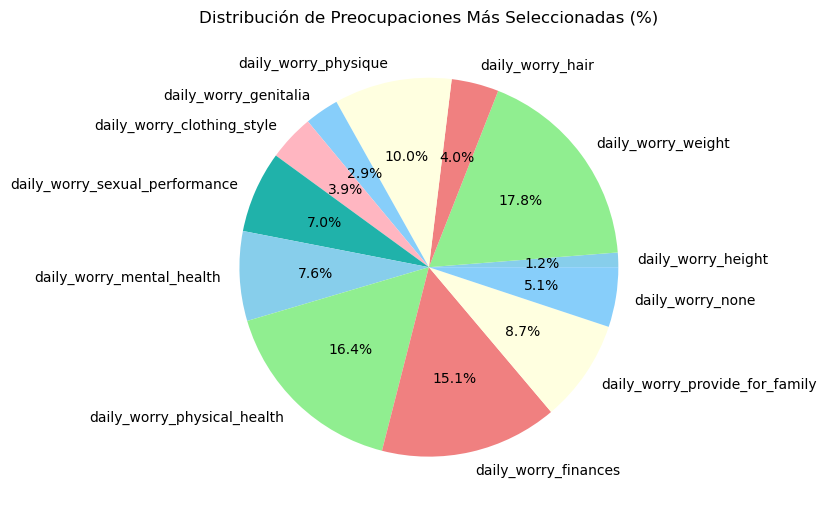

In [ ]:
selection_percentages = df_masc_surv[columns_to_process].mean() * 100
# Crear un gráfico circular (pie chart) para los porcentajes
plt.figure(figsize=(8, 8))  # Ajustar el tamaño de la figura
selection_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightskyblue', 'lightpink', 'lightseagreen'])

# Añadir título
plt.title("Distribución de Preocupaciones Más Seleccionadas (%)")

# Mostrar la gráfica
plt.tight_layout()  # Asegura que todo el texto y etiquetas se vean bien
plt.show()


##### Employment👷‍♂️

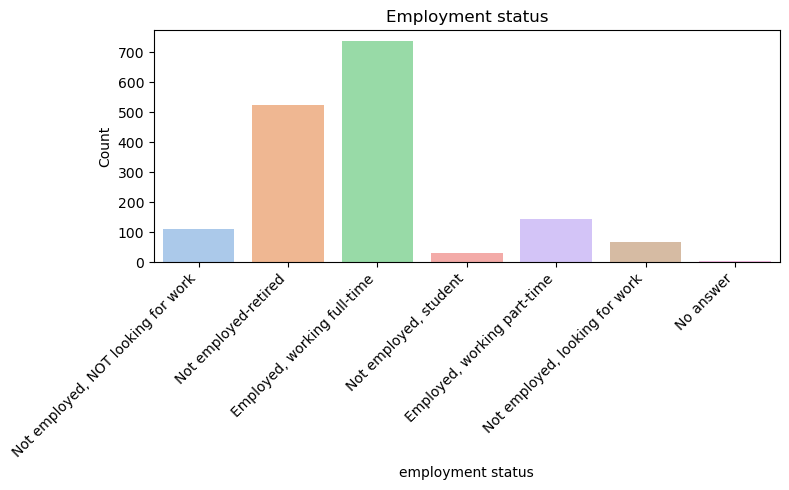

In [54]:


plt.figure(figsize=(8, 5))  # Tamaño de la figura
sns.countplot(data=df_masc_surv, x="employment_status", palette="pastel")

plt.title("Employment status")
plt.xlabel("employment status")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotación si los labels son largos

plt.tight_layout()
plt.show()


In [55]:
columns_to_analize2=["advantage_of_being_a_man_more_money",
     "advantage_of_being_a_man_taken_more_seriously",
     "advantage_of_being_a_man_more_choice",
     "advantage_of_being_a_man_more_promotion_opportunities",
     "advantage_of_being_a_man_praised_more",
     "advantage_of_being_a_man_more_manager_support",
     "advantage_of_being_a_man_other",
     "advantage_of_being_a_man_none",]


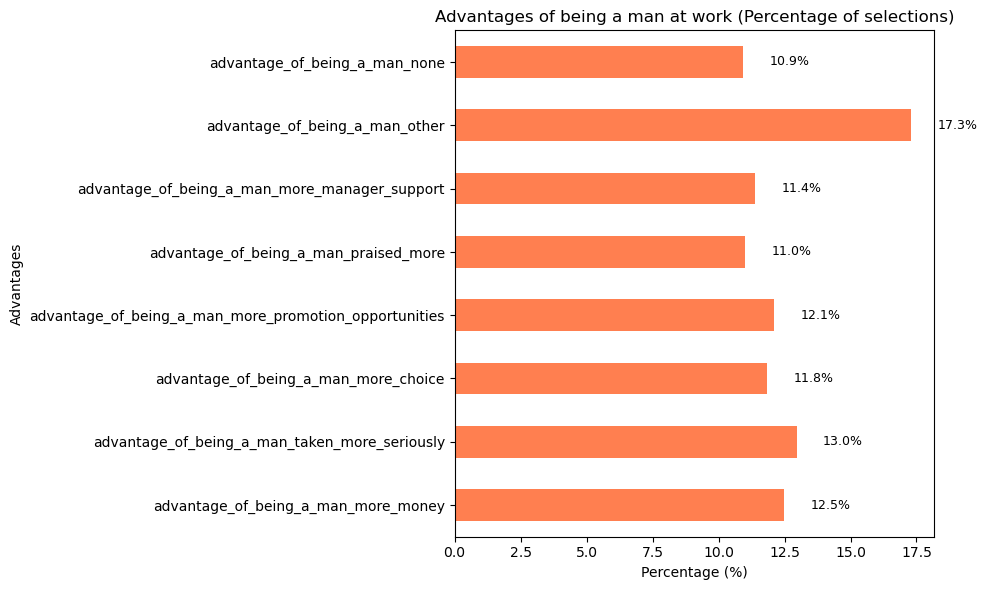

In [72]:
# Sumar las selecciones
selection_counts2 = df_masc_surv[columns_to_analize2].sum()

# Calcular porcentajes
selection_percentages = (selection_counts2 / selection_counts2.sum()) * 100

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
selection_percentages.plot(kind='barh', color='coral')  # 'barh' para barras horizontales

# Añadir título y etiquetas
plt.title("Advantages of being a man at work (Percentage of selections)")
plt.xlabel("Percentage (%)")
plt.ylabel("Advantages")
plt.yticks(rotation=0)  # Esto asegura que las etiquetas del eje Y no se roten

# Añadir los valores dentro de las barras
for i, value in enumerate(selection_percentages):
    plt.text(value + 1, i, f'{value:.1f}%', va='center', fontsize=9, color="black")

plt.tight_layout()
plt.show()


In [59]:
columns_to_analize3=["disadvantage_of_being_a_man_hiring_promoting_women",
    "disadvantage_of_being_a_man_risk_accusation_harassment",
    "disadvantage_of_being_a_man_risk_accusation_bias",
    "disadvantage_of_being_a_man_other",
    "disadvantage_of_being_a_man_none",
]


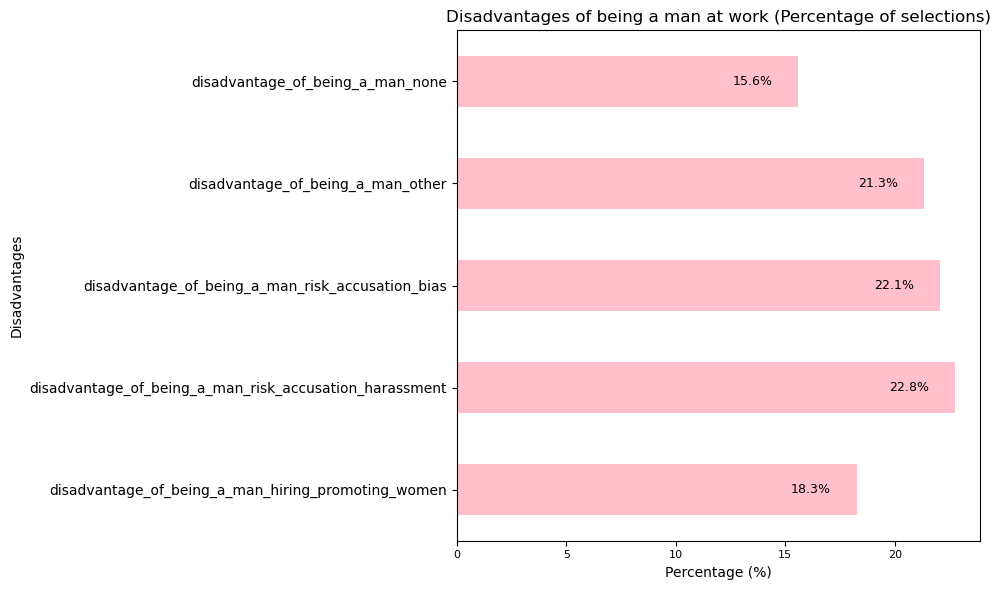

In [73]:
# Sumar las selecciones
selection_counts3 = df_masc_surv[columns_to_analize3].sum()

# Calcular porcentajes
selection_percentages2 = (selection_counts3 / selection_counts3.sum()) * 100

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
selection_percentages2.plot(kind='barh', color='pink')  # 'barh' para barras horizontales

# Añadir título y etiquetas
plt.title("Disadvantages of being a man at work (Percentage of selections)")
plt.xlabel("Percentage (%)")
plt.ylabel("Disadvantages")
plt.xticks(rotation=0, fontsize=8)  # Rotamos las etiquetas del eje X para que se vean bien y ajustamos el tamaño

# Añadir los valores dentro de las barras
for i, value in enumerate(selection_percentages2):
    # Ajuste para colocar los porcentajes dentro de las barras
    plt.text(value - 3, i, f'{value:.1f}%', va='center', fontsize=9, color='black')  # Los porcentajes dentro de las barras

plt.tight_layout()
plt.show()


 ##### Response to harassment 👁‍🗨

In [75]:
columns_to_analize4=["response_to_harassment_confronted_accused",
     "response_to_harassment_contacted_hr",
    "response_to_harassment_contacted_manager",
    "response_to_harassment_supported_victim",
    "response_to_harassment_did_nothing",
    "response_to_harassment_never_witnessed",
    "response_to_harassment_other"
    
]


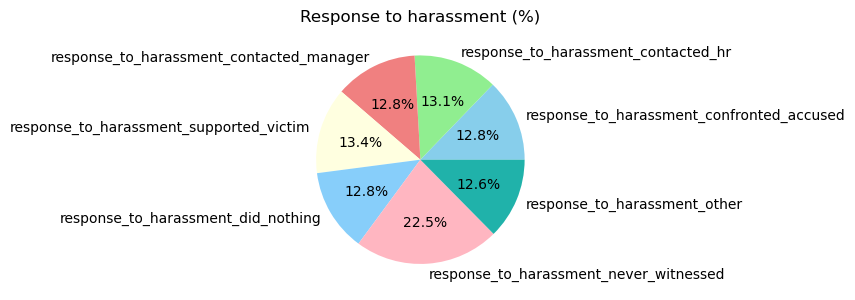

In [77]:
selection_percentages3 = df_masc_surv[columns_to_analize4].mean() * 100
# Crear un gráfico circular (pie chart) para los porcentajes
plt.figure(figsize=(8, 8))  # Ajustar el tamaño de la figura
selection_percentages3.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightskyblue', 'lightpink', 'lightseagreen'])

# Añadir título
plt.title("Response to harassment (%)")

# Mostrar la gráfica
plt.tight_layout()  # Asegura que todo el texto y etiquetas se vean bien
plt.show()


<Figure size 1200x600 with 0 Axes>

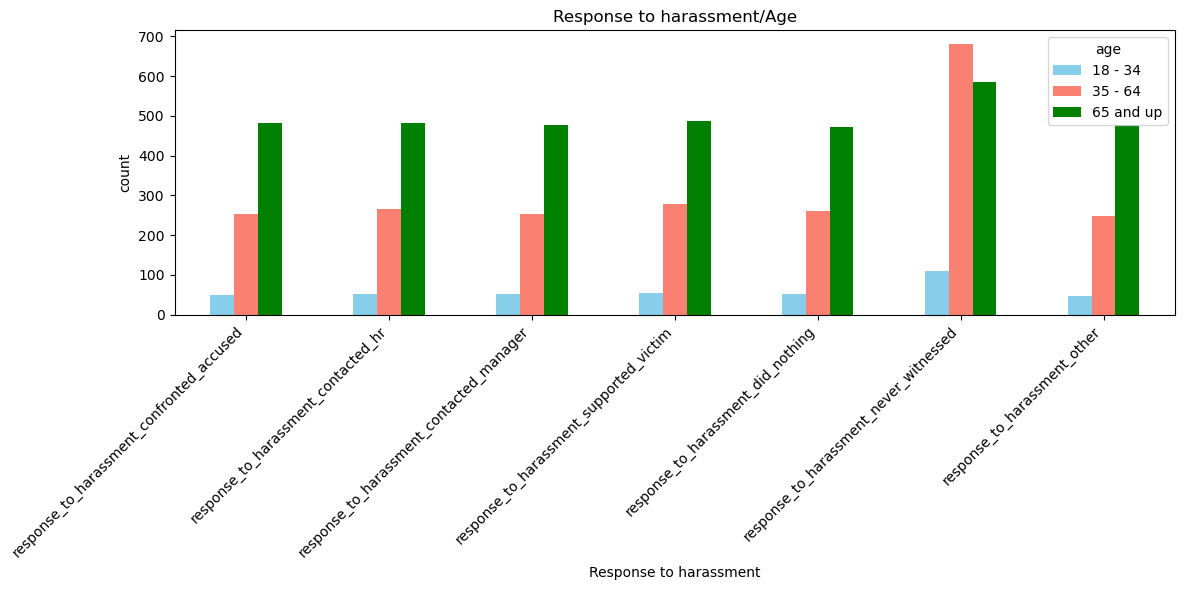

In [81]:

# Crear un nuevo DataFrame con la suma de cada preocupación por grupo
grouped_counts = df_masc_surv.groupby("age_group")[columns_to_analize4].sum().T

# Crear gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
grouped_counts.plot(kind='bar', figsize=(12, 6),color=["skyblue", "salmon","green","yellow","orange","pink"] )

# Añadir título y etiquetas
plt.title("Response to harassment/Age")
plt.xlabel("Response to harassment")
plt.ylabel("count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="age")

# Mostrar la gráfica
plt.tight_layout()
plt.show()


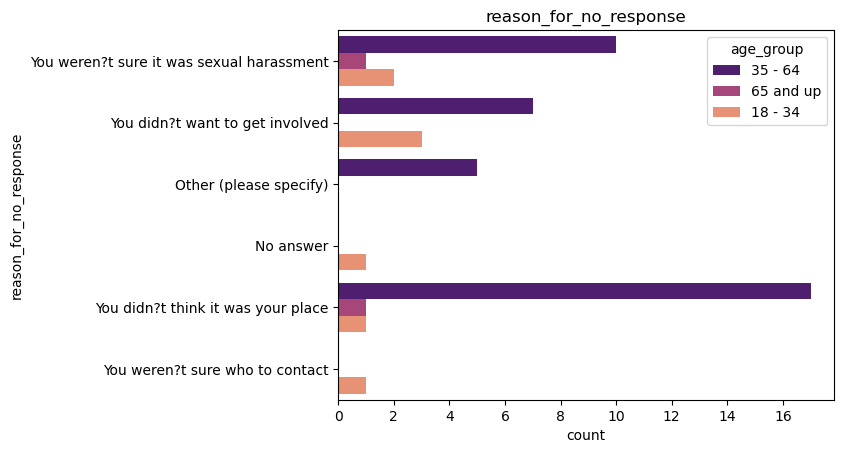

In [95]:
sns.countplot(y= "reason_for_no_response", data=df_masc_surv,hue="age_group", palette='magma')
plt.title("reason_for_no_response")
plt.show()